<a href="https://colab.research.google.com/github/GitTanish/Ml-Projects/blob/main/Plant_Disease_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import numpy as np
import os
import tensorflow as tf
# In newer versions of Keras, ImageDataGenerator is located in 'tensorflow.keras.preprocessing.image'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

###Loading Model

In [2]:
import os
import tensorflow as tf

model_path = r"C:\Users\shaik\Desktop\CROP\trained_model.keras"

if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
else:
    print(f"Error: Model file not found at {model_path}")
    # Handle the case where the model file is not found


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizing

In [101]:
import cv2

In [102]:
# from google.colab import files
# files.upload()

KeyboardInterrupt: 

In [ ]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# !kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p /content/Plant_disease_detection --unzip


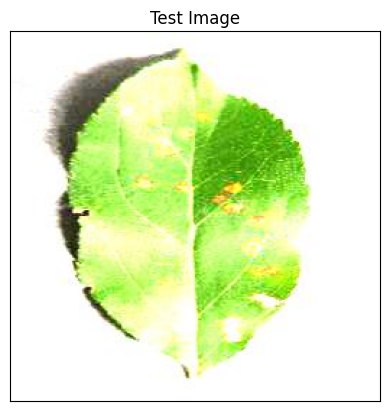

In [103]:
image_path='/content/Plant_disease_detection/test/test/AppleCedarRust1.JPG'
#Reading Image
img = cv2.imread(image_path)
# so we're getting the image in bgr format, converting it into rgb format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()
# so we're getting the image in bgr format

### Testing Model

In [104]:
# before testing we're doing pre processing

In [105]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [106]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


(array([[1.77758312e-11, 9.44024442e-11, 1.00000000e+00, 6.04039063e-13,
         6.86757665e-11, 1.06684572e-12, 4.19140828e-15, 2.80103076e-11,
         3.13911046e-16, 1.15373274e-13, 5.17048102e-18, 7.62798180e-09,
         1.11667715e-11, 1.48211814e-12, 3.20401275e-11, 2.74637205e-11,
         3.22168420e-12, 2.70481337e-12, 8.74760542e-10, 1.02716516e-10,
         8.89484666e-12, 6.21630785e-13, 2.67692400e-12, 7.45408984e-14,
         1.32400999e-14, 6.26992490e-14, 3.84501892e-12, 2.23367992e-14,
         7.24601490e-11, 3.18071645e-11, 1.56494002e-11, 7.19046540e-14,
         1.13554108e-08, 2.06975126e-15, 3.93143851e-11, 6.38462265e-13,
         2.28483763e-13, 9.28254001e-13]], dtype=float32),
 (1, 38))

In [107]:
class_name = [
['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']
]

In [108]:
result_index = np.argmax(prediction) # Use parentheses to call the function
result_index

np.int64(2)

### Displaying Result of disease prediction

In [109]:
model_prediction = class_name[0][result_index]
model_prediction

'Apple___Cedar_apple_rust'

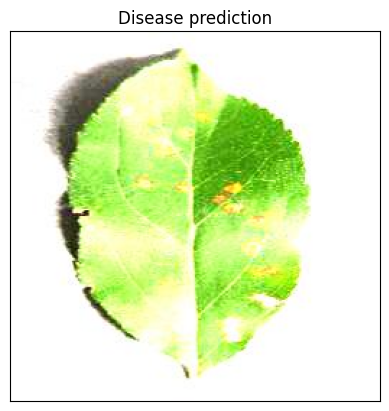

In [110]:
# Display Image
plt.imshow(img)
plt.title("Disease prediction")
plt.xticks([])
plt.yticks([])
plt.show()

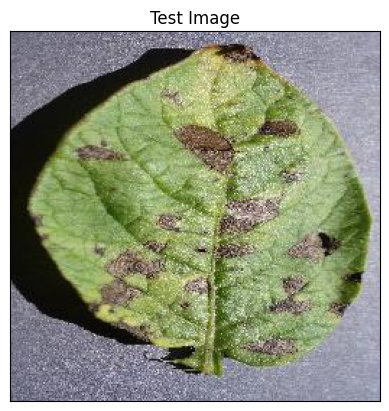

In [123]:
image_path='/content/Plant_disease_detection/test/test/PotatoEarlyBlight2.JPG'
#Reading Image
img = cv2.imread(image_path)
# so we're getting the image in bgr format, converting it into rgb format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()
# so we're getting the image in bgr format

In [124]:
model_prediction

'Tomato___Tomato_mosaic_virus'

In [125]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [126]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


(array([[9.8929967e-17, 6.6496256e-25, 1.5757852e-23, 1.1483685e-18,
         3.0480357e-24, 4.3835726e-21, 2.5571710e-27, 5.1671289e-18,
         4.2026412e-18, 4.4549290e-22, 1.8922685e-28, 6.0646710e-27,
         1.1151446e-26, 6.2204068e-22, 6.8759942e-29, 2.9102649e-24,
         4.9484772e-21, 3.6768220e-28, 6.3123687e-21, 6.9285697e-23,
         1.0000000e+00, 2.3719032e-16, 8.2899225e-21, 2.1275846e-27,
         2.1528045e-26, 1.7474727e-22, 1.6432615e-19, 1.3605535e-23,
         7.5380600e-25, 1.7560296e-18, 1.4342601e-15, 1.0636271e-20,
         5.8570761e-15, 5.3164791e-29, 7.3318878e-23, 2.8448348e-31,
         2.8957699e-31, 2.6575091e-17]], dtype=float32),
 (1, 38))

In [127]:
result_index = np.argmax(prediction) # Use parentheses to call the function
result_index

np.int64(20)

In [128]:
model_prediction = class_name[0][result_index]
model_prediction

'Potato___Early_blight'